# A. Assignment details

- What: Download, manipulate and merge two or more datasets from below
- How: Create functions in a python file to do this
- Show: Show how to use these python files in a notebook

More details here: reports/assignments/milestone_1/extracredit_explainer.md


## 1.1 Download data

In [ ]:
# YOUR CODE HERE
# need to pip install xxx ... ↓
import requests
import pandas as pd

def download_worldbank(indicator, countries, date_start, date_end):
    url_base = 'https://api.worldbank.org/v2/'  # Base URL for the World Bank API
    country_codes = ';'.join(countries)  # Combine country codes into a string
    url = url_base + f'country/{country_codes}/indicator/{indicator}?date={date_start}:{date_end}&per_page=30000' #create the url with start and end date.
    # url = url_base + f'country/{country_codes}/indicator/{indicator}?per_page=30000' # This line overrides the previous one. It will ignore start/end date.

    response = requests.get(url)  # Download data from the URL
    df = pd.read_xml(response.content)  # Convert the downloaded data to a table
    return df, url  # Return the table

In [56]:
# Science & Technology
# https://data.worldbank.org/indicator

# See https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures !!!!!!

# countries=all doesn't work without http"s" in url_base, but why ???
data_gdp_per_capita, url_gdp_per_capita = download_worldbank(
    indicator = 'NY.GDP.PCAP.CD', 
    countries = ['all'],
    date_start = '2023',
    date_end = '2023'
)

data_rd_expenditure_by_gdp, url_rd_expenditure_by_gdp = download_worldbank(
    indicator = 'GB.XPD.RSDV.GD.ZS', 
    countries = ['all'],
    date_start = '2023',
    date_end = '2023'
)

## 1.2 Manipulate Data

In [57]:
# Filter out unnecessary columns
data_gdp_per_capita = data_gdp_per_capita.loc[:, ["countryiso3code", "value"]]
data_rd_expenditure_by_gdp = data_rd_expenditure_by_gdp.loc[:, ["countryiso3code", "value"]]

# Drop rows with nan
data_gdp_per_capita = data_gdp_per_capita.dropna(subset=['value'])
data_rd_expenditure_by_gdp = data_rd_expenditure_by_gdp.dropna(subset=['value'])

# Rename "value" -> "xxx"
data_gdp_per_capita = data_gdp_per_capita.rename(columns={'countryiso3code': 'country', 'value': 'gdp_per_capita'})
data_rd_expenditure_by_gdp = data_rd_expenditure_by_gdp.rename(columns={'countryiso3code': 'country', 'value': 'rd_exp_by_gdp'})

In [58]:
display(data_gdp_per_capita)

,country,gdp_per_capita
0,AFE,1659.515290
1,AFW,1568.724310
2,ARB,7292.210408
3,CSS,16906.567214
4,CEB,22637.795011
...,...,...
260,VNM,4282.088517
262,PSE,3372.349744
263,YEM,477.409029
264,ZMB,1330.727806


In [59]:
display(data_rd_expenditure_by_gdp)

,country,rd_exp_by_gdp
57,ARM,0.18115
61,AZE,0.18178
66,BLR,0.57843
73,BIH,0.19228
84,CAN,1.70133
107,EGY,1.03356
121,GEO,0.25283
135,HKG,1.10339
149,KAZ,0.14472
150,KEN,0.80874


## 1.3 Merge Data

In [60]:
merged_df = pd.merge(data_gdp_per_capita, data_rd_expenditure_by_gdp, on='country', how='inner')

## 1.4 Data Visualization

<Axes: xlabel='rd_exp_by_gdp', ylabel='gdp_per_capita'>

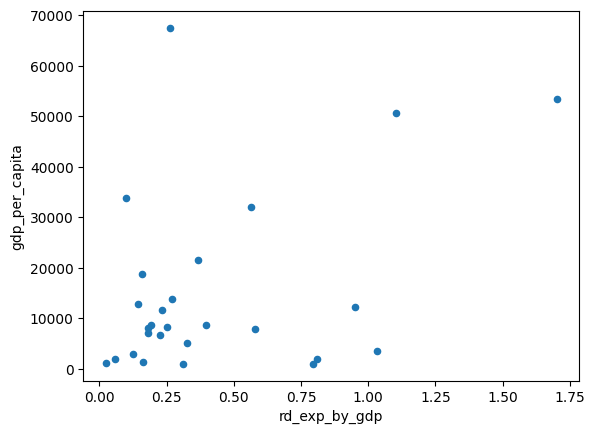

In [62]:
merged_df.plot.scatter(x='rd_exp_by_gdp', y='gdp_per_capita')

## Global datasets

- What: Download, manipulate and merge two or more datasets from below
- How: Create functions in a python file to do this
- Show: Show how to use these python files in a notebook

* **Penn World Table (PWT):** Provides purchasing power parity and national income accounts data.
    * **Link:** [http://www.ggdc.net/pwt](http://www.ggdc.net/pwt)

* **UNCTADstat (UNCTAD):** Offers data on trade, investment, and development.
    * **Link:** [https://unctadstat.unctad.org/](https://unctadstat.unctad.org/)

* **FAOSTAT (FAO):** Provides data on food, agriculture, forestry, and related areas.
    * **Link:** [http://www.fao.org/faostat/en/#data](http://www.fao.org/faostat/en/#data)

* **ILOSTAT (ILO):** Offers labor statistics, including employment and wages.
    * **Link:** [https://ilostat.ilo.org/](https://ilostat.ilo.org/)

* **Federal Reserve Economic Data (FRED):** Economic and financial data from the Federal Reserve.
    * **Link:** [https://fred.stlouisfed.org/](https://fred.stlouisfed.org/)

* **Bank for International Settlements (BIS):** Data and statistics on banking, financial markets, and the global economy.
    * **Link:** [https://www.bis.org/statistics/index.htm](https://www.bis.org/statistics/index.htm)

* **International Monetary Fund (IMF) Data:** A variety of macroeconomic and financial data.
    * **Link:** [https://www.imf.org/en/data](https://www.imf.org/en/data)

* **Eurostat:** Provides a wide range of statistics on the European Union, including economic, social, and demographic data.
    * **Link:** [https://ec.europa.eu/eurostat/](https://ec.europa.eu/eurostat/)

* **World Bank Data:** Comprehensive data on development indicators across countries.
    * **Link:** [https://data.worldbank.org/](https://data.worldbank.org/)

* **Varieties of Democracy (V-Dem):** Datasets measuring various aspects of democracy across countries.
    * **Link:** [https://v-dem.net/](https://v-dem.net/)

* **OECD Data:** Statistics and indicators from the Organisation for Economic Co-operation and Development, covering a broad range of topics.
    * **Link:** [https://data.oecd.org/](https://data.oecd.org/)

* **Quality of Government (QoG):** Datasets on governance, institutions, and quality of government.
    * **Link:** [https://qog.gu.se/](https://qog.gu.se/)

* **IPCC Data:** Climate change data and scenarios from the Intergovernmental Panel on Climate Change.
    * (Note: Access to data varies, often through specific reports or data portals linked within the IPCC website)
    * **Link:** [https://www.ipcc.ch/](https://www.ipcc.ch/)

* **Our World in Data:** Research and data on global development, poverty, health, and other topics.
    * **Link:** [https://ourworldindata.org/](https://ourworldindata.org/)

* **UN Comtrade:** United Nations Commodity Trade Statistics Database.
    * **Link:** [https://comtrade.un.org/](https://comtrade.un.org/)


## Academic datasets

* **Dallas Fed Global Economic Indicators (DGEI):** [DGEI](https://www.dallasfed.org/research/international/dgei)
* **Dallas Fed International House Price Database:** [House Price](https://www.dallasfed.org/research/international/houseprice#data)
* **New York Fed r* (Natural Rate of Interest):** [r*](https://www.newyorkfed.org/research/policy/rstar)
* **Chinn-Ito Index (KAOPEN):** [KAOPEN](https://web.pdx.edu/~ito/Chinn-Ito_website.htm)
* **Metrick-Schmelzing Paper and Database (Long-Term Real Rates):** [Real Rates](https://som.yale.edu/centers/program-on-financial-stability/metrick-schmelzing-paper-and-database)
* **Yale Program on Financial Stability COVID-19 Tracker:** [COVID-19 Tracker](https://som.yale.edu/centers/program-on-financial-stability/covid-19-tracker)
* **IMF Financial Integration:** [Financial Integration](https://www.imf.org/en/Publications/WP/Issues/2017/05/10/International-Financial-Integration-in-the-Aftermath-of-the-Global-Financial-Crisis-44906)
* **IMF Macroprudential Policy Survey:** [Macroprudential](https://www.elibrary-areaer.imf.org/Macroprudential/Pages/Home.aspx)
* **Nancy Xu's Risk Aversion Index:** [Risk Aversion](https://www.nancyxu.net/risk-aversion-index)
* **Jorda-Schularick-Taylor Macrohistory Database:** [Macrohistory](https://www.nber.org/research/data/jorda-schularick-taylor-macrohistory)
* **Central Bank Independence (CBI) Data:** [CBI Data](https://sites.google.com/site/carogarriga/cbi-data-1)
* **Global Inflation Data:** [Inflation Data](https://www.worldbank.org/en/research/brief/inflation-database)

## U.S Datasets
- https://www.sca.isr.umich.edu/tables.html
- https://www.bea.gov/data
- https://www.bls.gov/jlt/
- https://adpemploymentreport.com/

## Japan datasets

* **Economy Watchers Survey (Cabinet Office):** [Watchers Survey](https://www5.cao.go.jp/keizai3/watcher.html)
* **Consumption Trend Index (ESRI, Cabinet Office):** [Consumption Index](https://www.esri.cao.go.jp/en/stat/shouhi/shouhi-e.html)
* **Prefectural Accounts (ESRI, Cabinet Office):** [Prefectural Accounts](https://www.esri.cao.go.jp/jp/sna/sonota/kenmin/kenmin_top.html)
* **Insurance Statistics (General Insurance Association of Japan):** [Insurance Stats](https://www.sonpo.or.jp/en/statistics/index.html)
* **FSA Policy Response (Financial Services Agency):** [FSA Response](https://www.fsa.go.jp/news/r1/20200313-2.html)
* **Franchise Industry Data (Japan Franchise Association):** [Franchise Data](https://www.jfnet.or.jp/data/data_c.html)
* **Trends Foreign Visitors (MLIT, Japan Tourism Agency):** [Visitor Spending](https://www.mlit.go.jp/kankocho/tokei_hakusyo/gaikokujinshohidoko.html)
* **Tax and Stamp Revenues (Ministry of Finance):** [Tax Revenues](https://www.mof.go.jp/tax_policy/reference/taxes_and_stamp_revenues/data.htm)
* **Life Insurance Statistics (Life Insurance Association of Japan):** [Life Insurance](https://www.seiho.or.jp/english/statistics/)
* **Economic Growth (Tokyo Foundation for Policy Research):** [GDP](https://www.tkfd.or.jp/research/detail.php?id=2983)
* **Consumer Price Index (Statistics Bureau of Japan):** [CPI](https://www.stat.go.jp/english/data/cpi/1588.html#his)
* **Bank Financial Statements (Financial Services Agency):** [Bank Statements](https://www.fsa.go.jp/status/ginkou_kessan/index.html)
* **Budget Revenue and Expenditure (Ministry of Finance):** [Budget Data](https://www.mof.go.jp/policy/budget/report/revenue_and_expenditure/index.htm)
* **Trade Statistics (Japan Customs):** [Trade Stats](https://www.customs.go.jp/toukei/info/index_e.htm)
* **Banking Statistics (Japanese Bankers Association):** [Banking Stats](https://www.zenginkyo.or.jp/stats/year2-02/)
* **Household Expenditure Survey (Statistics Bureau):** [Household Spending](https://www.stat.go.jp/data/kakei/longtime/index.html#time)
* **Economic Statistics (Federation of Economic Organizations):** [Econ Stats](https://www.zenkeijikyo.or.jp/statistics)
* **Regional Banks:** [Regional Banks data](https://www.chiginkyo.or.jp/news_topics/)
* **Japan Economic Policy Uncertainty Index:** [Policy Uncertainty](https://www.policyuncertainty.com/japan_monthly.html)